           GET      POST       PUT
time                              
1     0.850427  0.151846  0.095672
2     1.110321  0.117528  0.087839
3     0.787473  0.075000  0.067364
4     0.733795  0.048113  0.058118
5     0.738149  0.039764  0.001109


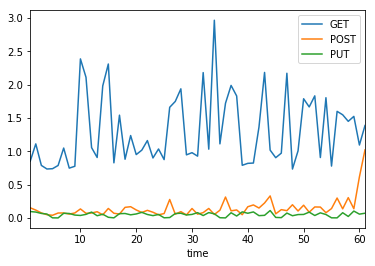

In [1]:
# line plot of time series
from pandas import Series, DataFrame
from matplotlib import pyplot
# load dataset
series = DataFrame.from_csv('http_requests_duration_per_second.csv', header=0)
# display first few rows
print(series.head(5))
# line plot of dataset
series.plot()
pyplot.show()

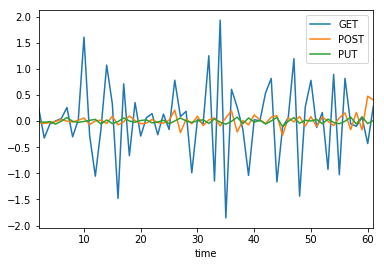

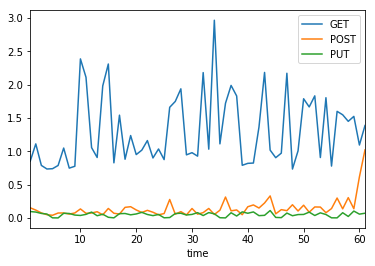

In [3]:
# seasonally adjust the time series
from pandas import Series,DataFrame
from matplotlib import pyplot
# load dataset
series = DataFrame.from_csv('http_requests_duration_per_second.csv', header=0)
# seasonal difference. e.g 1 day, here one, because sample is too small 
differenced = series.diff(1)[1:]
# save differenced dataset to file
differenced.to_csv('http_requests_duration_per_second_seasonally_adjusted.csv')
# plot differenced dataset
differenced.plot()
series.plot()
pyplot.show()

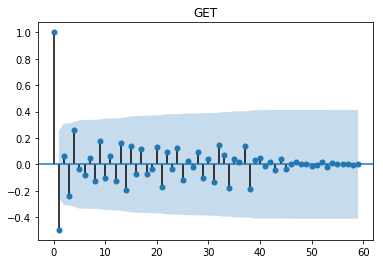

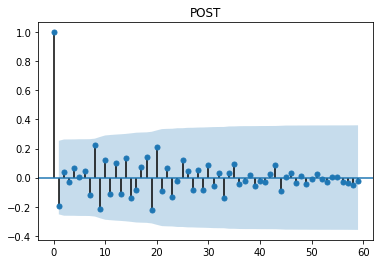

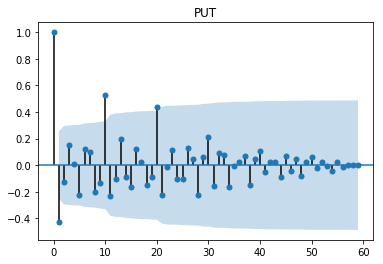

In [6]:
from pandas import DataFrame
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
df = DataFrame.from_csv('http_requests_duration_per_second_seasonally_adjusted.csv', header=0)
plot_acf(df.iloc[:,0], title="GET")
plot_acf(df.iloc[:,1], title="POST")
plot_acf(df.iloc[:,2], title="PUT")
pyplot.show()

In [7]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# load dataset
dataframe = read_csv('http_requests_duration_per_second_seasonally_adjusted.csv', header=0)
# separate into input and output variables
array = dataframe.values
X = array[:,1:3]
y = array[:,0]

# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features to predict PUTs:')
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

Selected Features to predict PUTs:
time
GET


ValueError: incompatible sizes: argument 'height' must be length 3 or scalar